## Zomato Analysis

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
zomato_data = pd.read_csv('Zomato data .csv')

In [3]:
zomato_data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


## Showing Insights Of Dataset

In [4]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


#### Conclusion : There is no null values in dataset

## Data Analysis

In [5]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

zomato_data['rate'] = zomato_data['rate'].apply(handleRate)

In [6]:
zomato_data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


## Data Visualiazation

Text(0.5, 0, 'Types Of Restaurant')

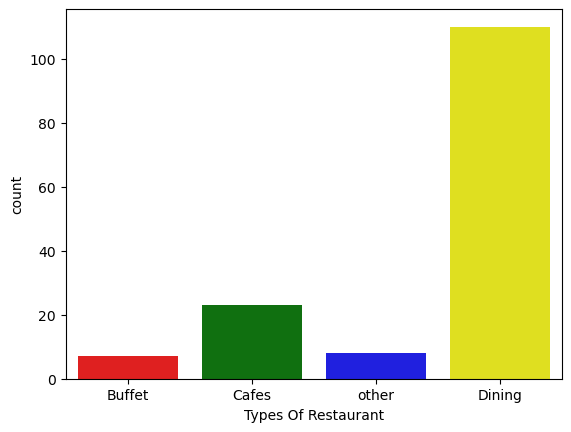

In [7]:
palette = ['red','green','blue','yellow']
sns.countplot(x=zomato_data['listed_in(type)'],data=zomato_data, palette=palette)
plt.xlabel('Types Of Restaurant')

#### Conclusion : The majority of the resaurants fall into "dining" category

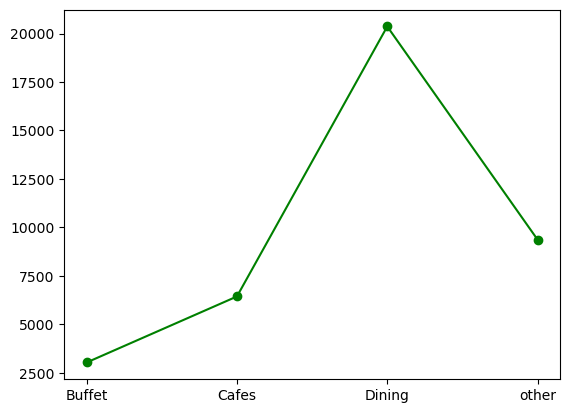

In [8]:
grouped_data = zomato_data.groupby('listed_in(type)')['votes'].sum()
grouped_data
result = pd.DataFrame(grouped_data)
plt.plot(result,c='green',marker='o')

#### Conclusion : Dining restaurants are preffered by a larger number of individuals

In [9]:
max_votes = zomato_data['votes'].max()
zomato_data.loc[zomato_data['votes'] == max_votes, 'name']

38    Empire Restaurant
Name: name, dtype: object

<Axes: xlabel='online_order', ylabel='count'>

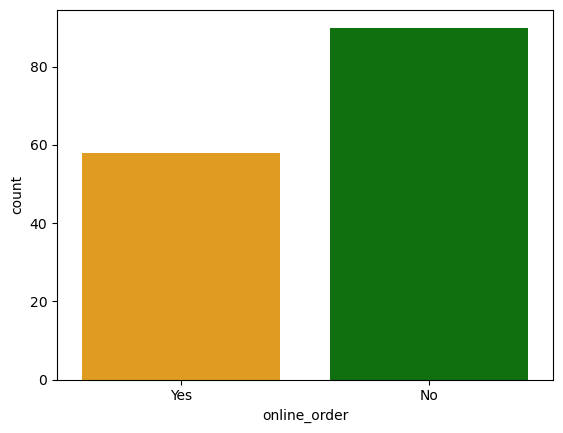

In [10]:
color = ['orange','green']
sns.countplot(x=zomato_data['online_order'],palette=color)

#### Conclusion : This suggests that a majority of the restaurants do not accept online orders.

Text(0.5, 1.0, 'Rating Distribution')

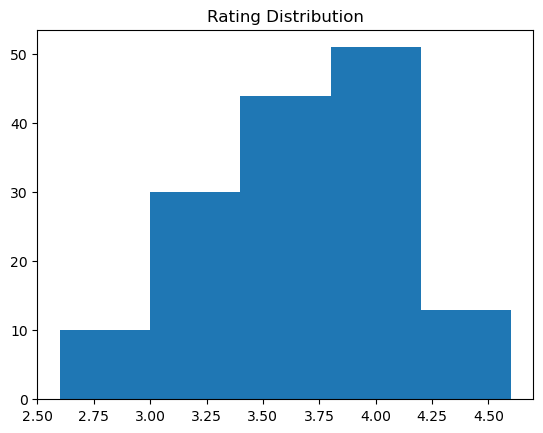

In [11]:
plt.hist(zomato_data['rate'], bins=5)
plt.title('Rating Distribution')

#### Conclusion : The majority of restaurants received ratings ranging from 3.5 to 4.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

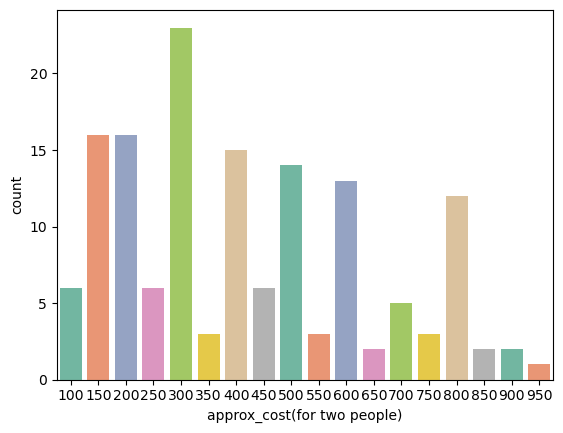

In [12]:
sns.countplot(x=zomato_data['approx_cost(for two people)'],palette='Set2')

#### Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.

<Axes: >

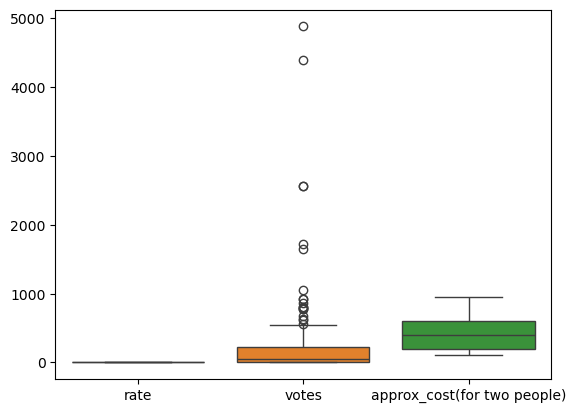

In [13]:
numerical_col = zomato_data.select_dtypes(include='number')
sns.boxplot(data=numerical_col)

Text(50.722222222222214, 0.5, 'Listed In (Type)')

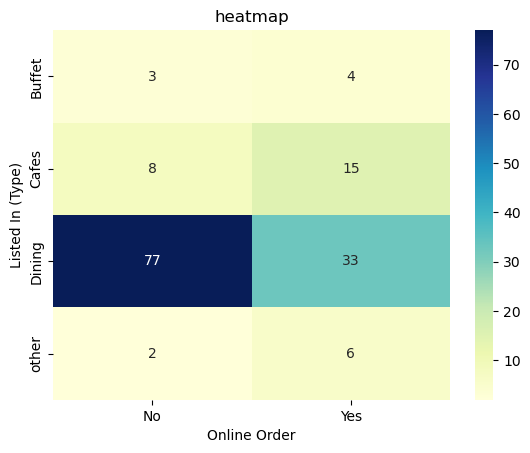

In [14]:
pivot_tabel = zomato_data.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_tabel, annot=True, cmap='YlGnBu')
plt.title('heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')

#### Conclusion : Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.